In [27]:
import keras
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.optimizers import SGD
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [28]:
train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [29]:
class StemmedCountVectorizer(CountVectorizer):
  def build(self):
    analyzer = super(StemmedCountVectorizer, self).build_analyzer()
    return lambda text: ([stemmer.stem(word) for word in analyzer(text)])
  
stemmer = SnowballStemmer('english', ignore_stopwords=True)
stem_count_vec = StemmedCountVectorizer(stop_words='english')

stem_count_vec.fit(train.data)

X_train = stem_count_vec.transform(train.data)
X_test = stem_count_vec.transform(test.data)

num_classes = np.max(train['target']) + 1

y_train = to_categorical(train.target, num_classes)
y_test = to_categorical(test.target, num_classes)

In [30]:
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model_1 = keras.Sequential(
  [
    layers.Dense(64, input_dim=input_dim, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_dim, activation='softmax'),
  ]
)

model_1.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['acc'])

history = model_1.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=True,
                      validation_data=(X_test, y_test),
                      batch_size=32)

Epoch 1/50


c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_12/dense_30/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_12/dense_30/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_12/dense_30/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


354/354 [==============================] - 12s 31ms/step - loss: 2.6032 - acc: 0.3764 - val_loss: 2.2682 - val_acc: 0.6519
Epoch 2/50
354/354 [==============================] - 4s 10ms/step - loss: 2.0429 - acc: 0.5998 - val_loss: 1.9192 - val_acc: 0.7001
Epoch 3/50
354/354 [==============================] - 3s 10ms/step - loss: 1.5724 - acc: 0.6900 - val_loss: 1.6531 - val_acc: 0.7373
Epoch 4/50
354/354 [==============================] - 4s 10ms/step - loss: 1.3056 - acc: 0.7422 - val_loss: 1.4631 - val_acc: 0.7560
Epoch 5/50
354/354 [==============================] - 4s 10ms/step - loss: 1.1488 - acc: 0.7805 - val_loss: 1.3279 - val_acc: 0.7691
Epoch 6/50
354/354 [==============================] - 3s 10ms/step - loss: 0.9925 - acc: 0.8053 - val_loss: 1.2461 - val_acc: 0.7795
Epoch 7/50
354/354 [==============================] - 4s 10ms/step - loss: 1.1756 - acc: 0.8182 - val_loss: 1.2332 - val_acc: 0.7847
Epoch 8/50
354/354 [==============================] - 3s 10ms/step - loss: 0.83

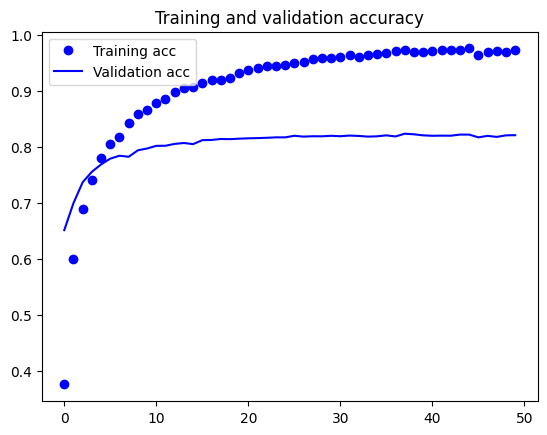

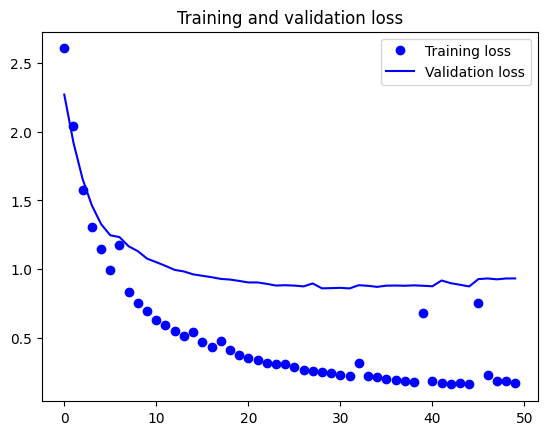

In [31]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history)

Epoch 1/50


c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_13/dense_32/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_13/dense_32/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_13/dense_32/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1132/1132 [==============================] - 12s 9ms/step - loss: 2.0959 - acc: 0.5732 - val_loss: 1.4820 - val_acc: 0.7289
Epoch 2/50
1132/1132 [==============================] - 9s 8ms/step - loss: 1.2319 - acc: 0.7962 - val_loss: 1.2736 - val_acc: 0.7625
Epoch 3/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.7390 - acc: 0.8604 - val_loss: 1.0144 - val_acc: 0.7933
Epoch 4/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.5339 - acc: 0.8967 - val_loss: 0.9339 - val_acc: 0.8011
Epoch 5/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.4191 - acc: 0.9230 - val_loss: 0.8799 - val_acc: 0.8064
Epoch 6/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.3415 - acc: 0.9403 - val_loss: 0.8579 - val_acc: 0.8121
Epoch 7/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.2869 - acc: 0.9504 - val_loss: 0.8287 - val_acc: 0.8135
Epoch 8/50
1132/1132 [==============================] - 6s 5ms/step - lo

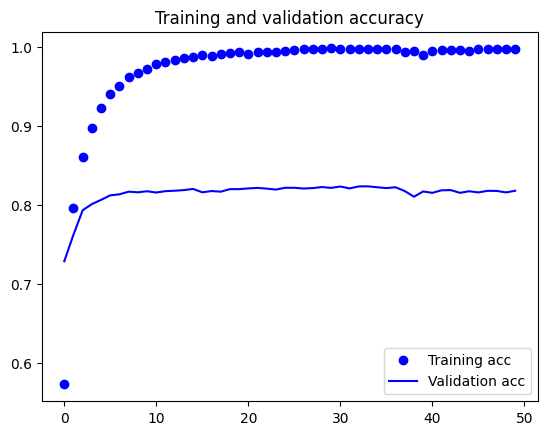

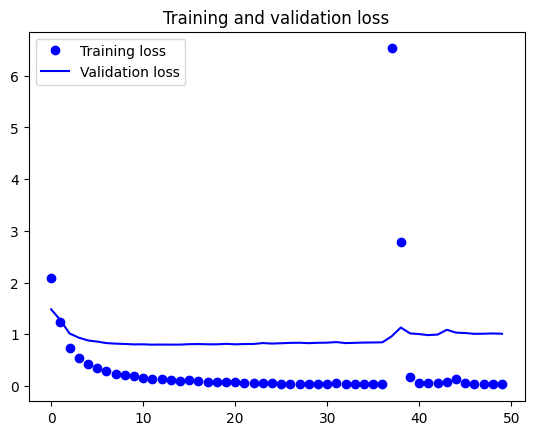

In [32]:
model_2 = keras.Sequential(
  [
    layers.Dense(128, input_dim=input_dim, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_dim, activation='softmax'),
  ]
)

model_2.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['acc'])

history = model_2.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=True,
                      validation_data=(X_test, y_test),
                      batch_size=10)

plot_history(history)

Epoch 1/50


c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_14/dense_34/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_14/dense_34/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_14/dense_34/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1132/1132 [==============================] - 7s 6ms/step - loss: 3.7368 - acc: 0.2317 - val_loss: 2.2332 - val_acc: 0.5171
Epoch 2/50
1132/1132 [==============================] - 6s 5ms/step - loss: 1.8284 - acc: 0.5006 - val_loss: 1.5043 - val_acc: 0.6510
Epoch 3/50
1132/1132 [==============================] - 6s 5ms/step - loss: 8.0676 - acc: 0.6214 - val_loss: 4.3861 - val_acc: 0.7395
Epoch 4/50
1132/1132 [==============================] - 6s 5ms/step - loss: 4.6972 - acc: 0.7093 - val_loss: 3.6594 - val_acc: 0.7358
Epoch 5/50
1132/1132 [==============================] - 6s 5ms/step - loss: 61019.6406 - acc: 0.1772 - val_loss: 2.9933 - val_acc: 0.0522
Epoch 6/50
1132/1132 [==============================] - 6s 5ms/step - loss: 2.9956 - acc: 0.0521 - val_loss: 2.9913 - val_acc: 0.0522
Epoch 7/50
1132/1132 [==============================] - 6s 5ms/step - loss: 2.9913 - acc: 0.0517 - val_loss: 2.9906 - val_acc: 0.0522
Epoch 8/50
1132/1132 [==============================] - 6s 5ms/step -

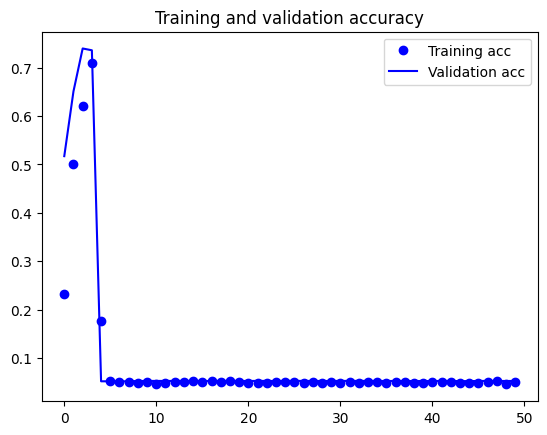

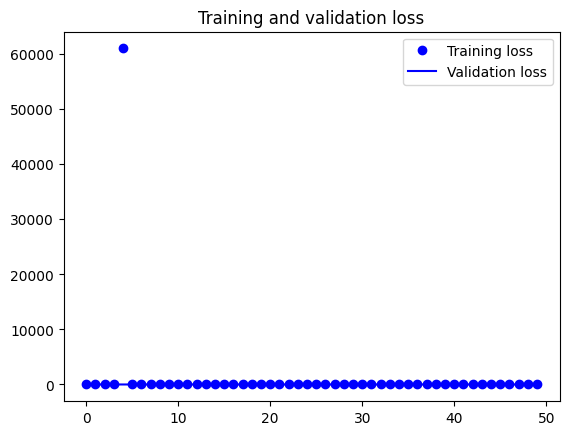

In [33]:
model_3 = keras.Sequential(
  [
    layers.Dense(128, input_dim=input_dim, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_dim, activation='softmax'),
  ]
)

model_3.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['acc'])

history = model_3.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=True,
                      validation_data=(X_test, y_test),
                      batch_size=10)

plot_history(history)

Epoch 1/50


c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_15/dense_37/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_15/dense_37/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_15/dense_37/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


354/354 [==============================] - 3s 7ms/step - loss: 2.6469 - acc: 0.2875 - val_loss: 2.2831 - val_acc: 0.5978
Epoch 2/50
354/354 [==============================] - 2s 6ms/step - loss: 2.0206 - acc: 0.5276 - val_loss: 1.9498 - val_acc: 0.6828
Epoch 3/50
354/354 [==============================] - 2s 6ms/step - loss: 1.5727 - acc: 0.6488 - val_loss: 1.5269 - val_acc: 0.7415
Epoch 4/50
354/354 [==============================] - 2s 6ms/step - loss: 1.1997 - acc: 0.7386 - val_loss: 1.2895 - val_acc: 0.7706
Epoch 5/50
354/354 [==============================] - 2s 6ms/step - loss: 0.9335 - acc: 0.7995 - val_loss: 1.1570 - val_acc: 0.7763
Epoch 6/50
354/354 [==============================] - 2s 6ms/step - loss: 0.7653 - acc: 0.8367 - val_loss: 1.0649 - val_acc: 0.7943
Epoch 7/50
354/354 [==============================] - 2s 6ms/step - loss: 0.6384 - acc: 0.8609 - val_loss: 0.9984 - val_acc: 0.7993
Epoch 8/50
354/354 [==============================] - 2s 6ms/step - loss: 0.5438 - acc:

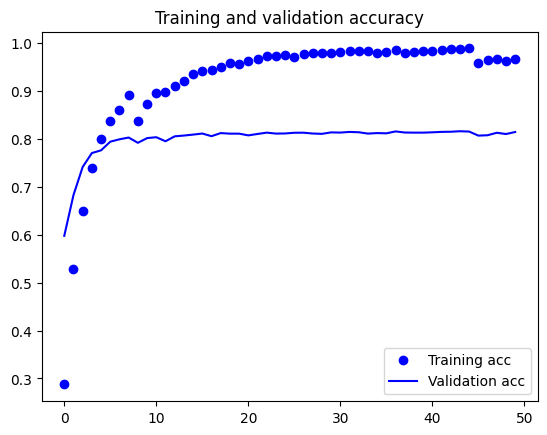

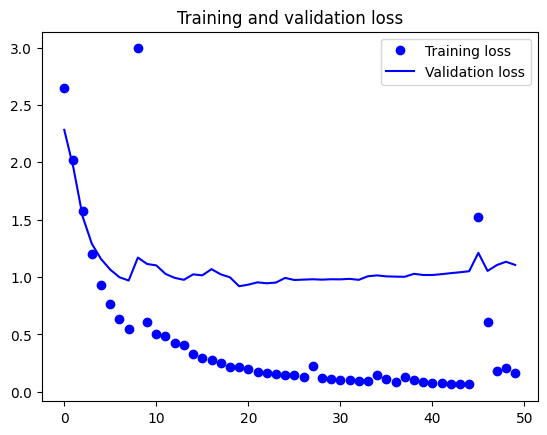

In [34]:
model_4 = keras.Sequential(
  [
    layers.Dense(128, input_dim=input_dim, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_dim, activation='softmax'),
  ]
)

model_4.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['acc'])

history = model_4.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=True,
                      validation_data=(X_test, y_test),
                      batch_size=32)

plot_history(history)